# The Gig Economy

# Methods:



# **1.Netnography of Gig Economy Workers:**



 We will conduct a deep dive into the online spaces where gig workers congregate, discussing and sharing their experiences. Our netnographic study will identify prevalent themes that indicate community belonging and individual purpose among gig workers.



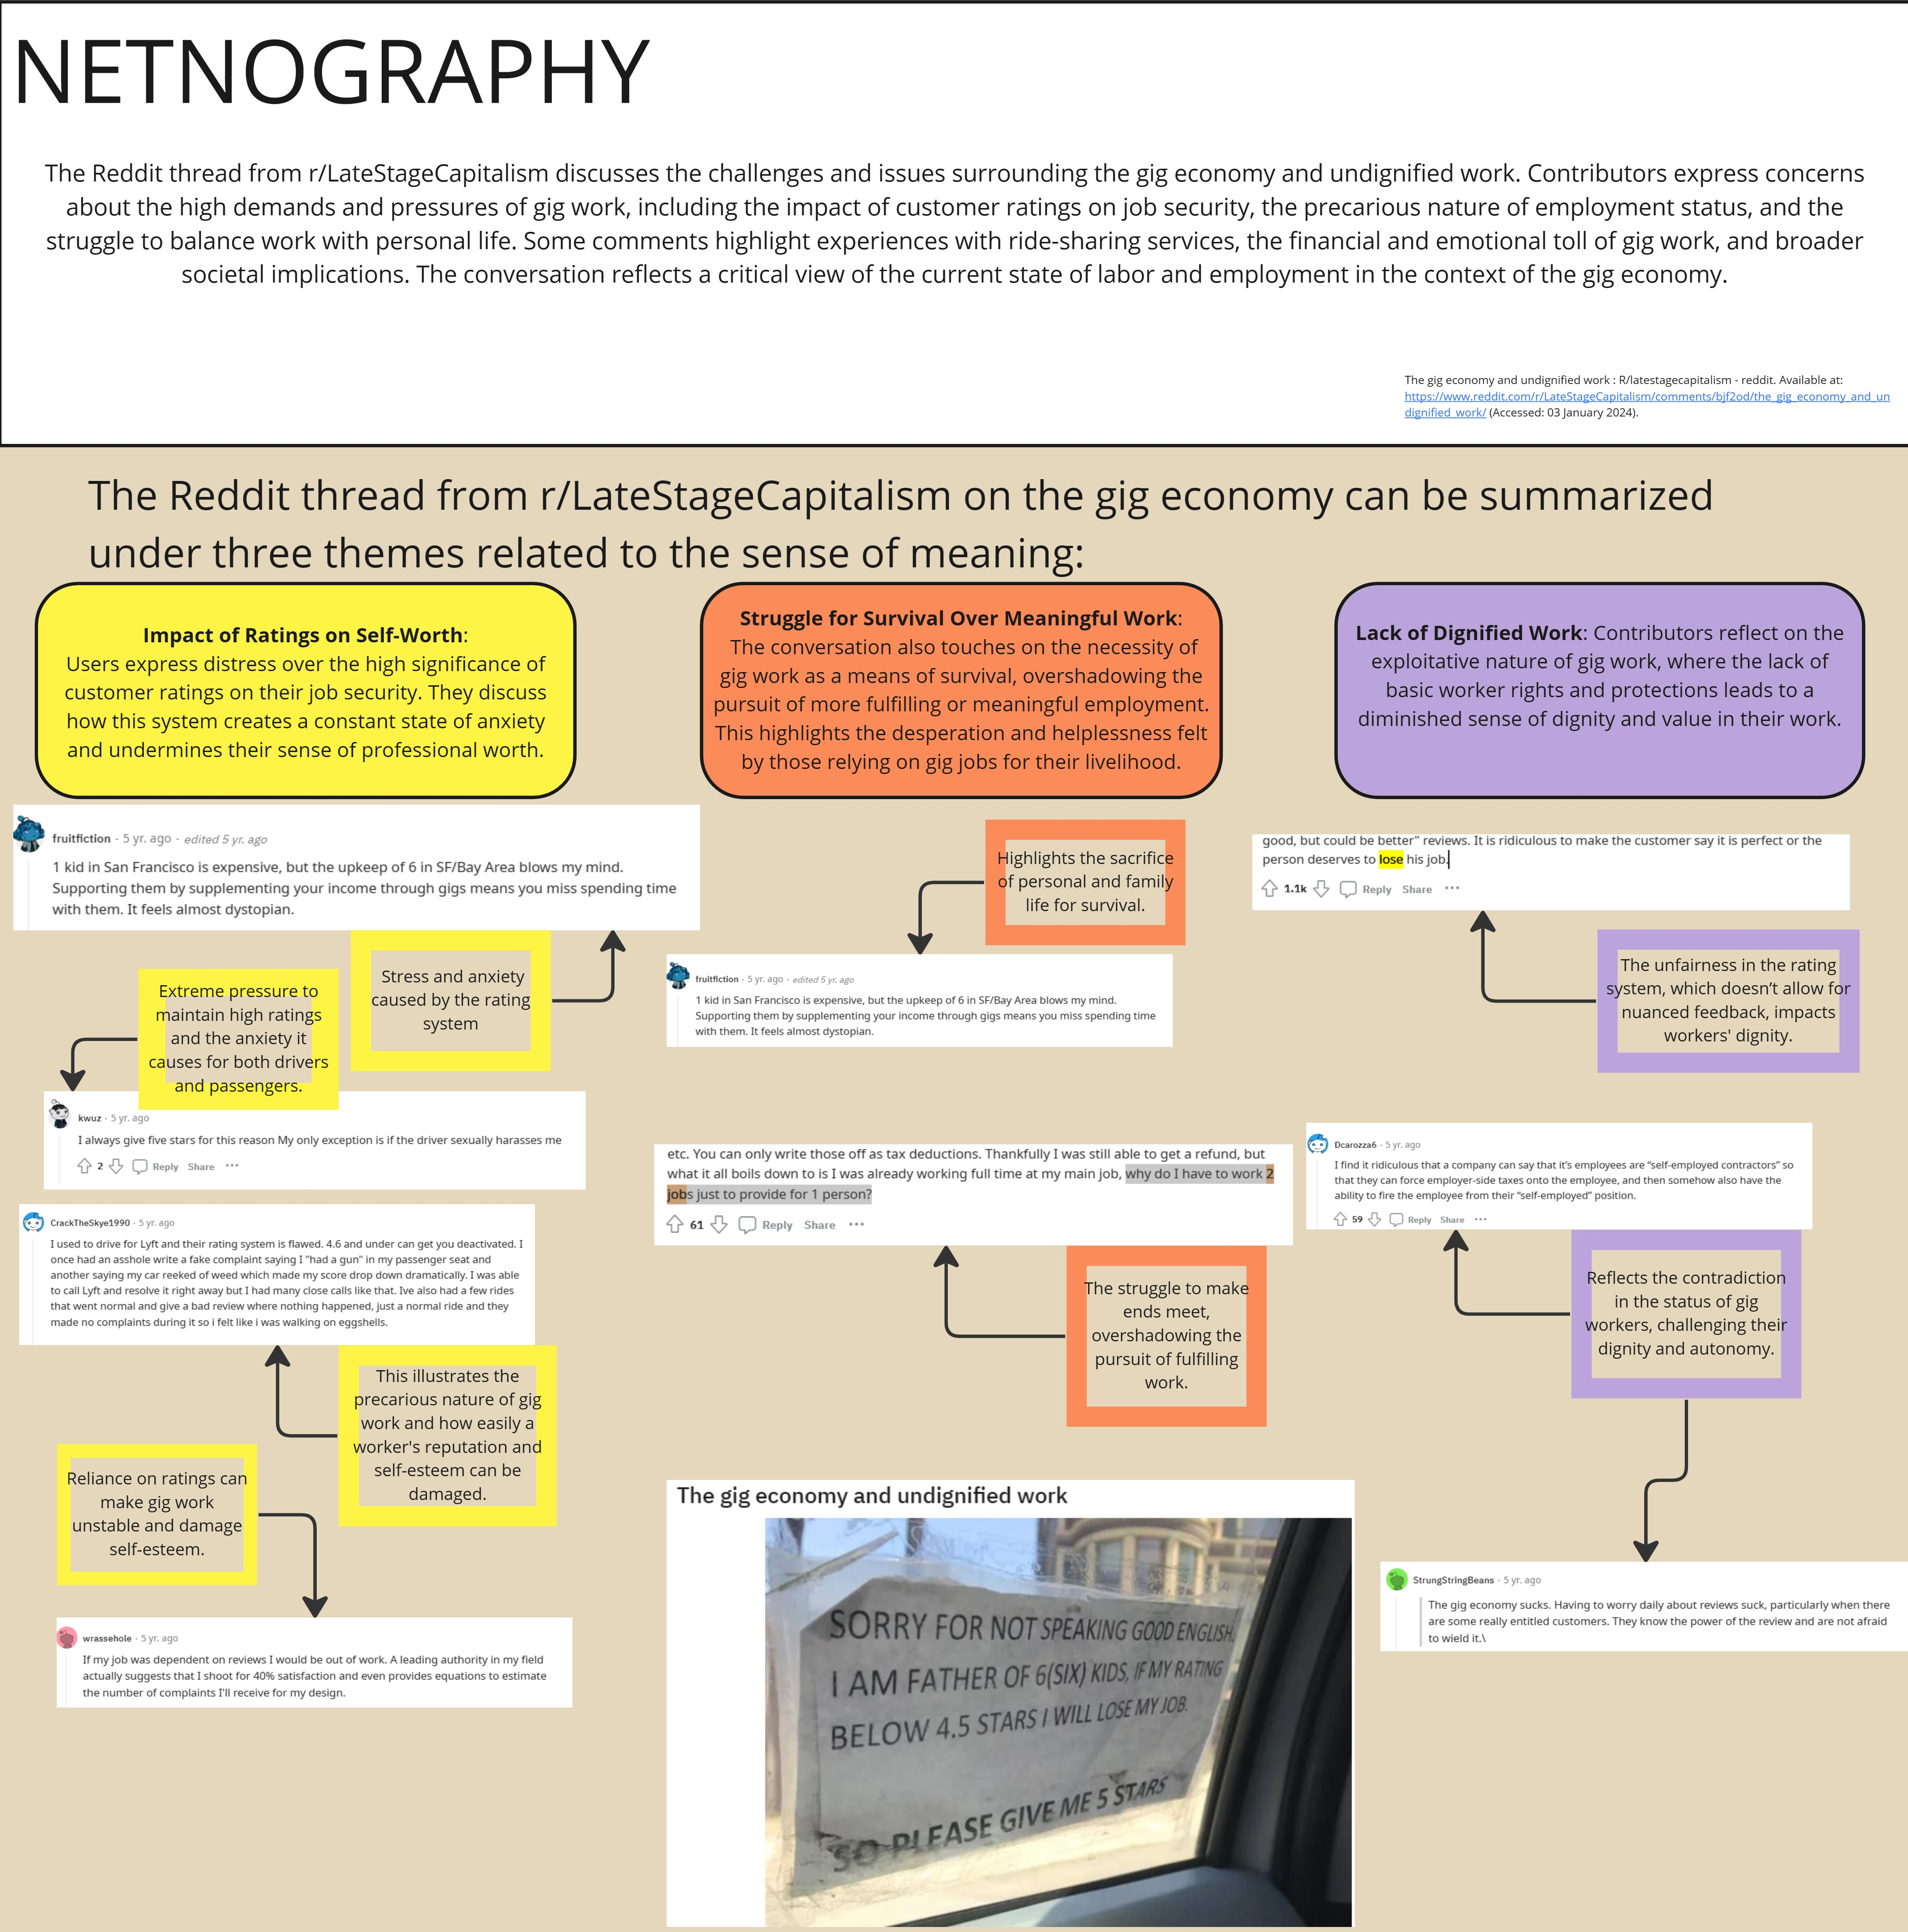

# **2.Machine Learning:**

Sentiment Analysis: Leveraging machine learning tools, we will perform topic modelling and sentiment analysis on corpus of articles related to the gig economy. This will help us analyse current media discoruse surrounding the gig economy and provide us with an empirical measure of the emotional undertones prevelant in how the gig economy is being mentioned in society writ large, aswell as identify key topics that need to be considered when exploring the gig economy and its future.

The Code below will retrieve articles about the Gig Economy using 'News Api'. This API enables one to locate articles and breaking news headlines from news sources and blogs across the web - based on various input parameters. The articles for which the HTML code is available are stored in a list called 'articles_with_html_text'. In this list, each article is stored as a dictionary with various key,value pairs to store its data. The code seek to access the HTML code for each article and extract, just the article text which is then stored under a seperate key in each article dictionary.

In [ ]:
# IMPORTING RELEVANT LIBRARIES
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# OBTAINING THE ARTICLES

api_key = "b7fa846f2ee046cbb536af548d80d6b4"
base_url = 'https://newsapi.org/v2/'

# Specify the query (topic and keywords) and number of articles
query = 'gig economy'
num_articles = 100
language = 'en'

# Construct the URL and parameters
url = f"{base_url}everything"
params = {
    'q': query,
    'pageSize': num_articles,
    'language': language,
    'apiKey': api_key
}

# Dictionary to store information about each article
articles_data = []

# Make the API request to get a list of articles
response = requests.get(url, params=params)

if response.status_code == 200:
    news_data = response.json()
    articles = news_data.get('articles', [])

    # Create a new list to store filtered data where the HTML of the Article is available
    articles_with_html_text = []

    for index, article in enumerate(articles, start=1):
        article_info = {
            'index': index,
            'title': article.get('title', 'N/A'),
            'description': article.get('description', 'N/A'),
            'url': article.get('url', 'N/A'),
            'text': 'N/A',  # Placeholder for text, will be updated below
            'date': article.get('publishedAt', 'N/A')
        }

        # Make a new API request to get the full text of the article
        article_url = article.get('url')
        if article_url:
          article_response = requests.get(article_url)
          if article_response.status_code == 200:
                article_text = article_response.text
                article_info['text'] = article_text

                # Append the article_info to the filtered list
                articles_with_html_text.append(article_info)
          else:
                # print(f"Error fetching article text: {article_response.status_code}")
                print(f"Collecting Articles")
        articles_data.append(article_info)


else:
    print(f"Error: {response.status_code}")
    print(response.text)

from bs4 import BeautifulSoup

for article_info in articles_with_html_text:
    # Extract the content using BeautifulSoup
    soup = BeautifulSoup(article_info['text'], 'html.parser')

    # Exclude elements with certain classes or text content
    exclude_elements = ['Jump to']
    for element in soup(exclude_elements):
        element.decompose()

    # Extract paragraphs
    paragraphs = soup.find_all('p')
    content = '\n'.join([paragraph.get_text() for paragraph in paragraphs])

    # Add the content to the dictionary
    article_info['content'] = content

The code below uses the machine learning technique of Latent Dirichlet Allocation (LDA) for topic modeling on a collection of articles. The topics identified are printed at the end.

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd

# Extracting features using TF-IDF
texts = [article['content'] for article in articles_with_html_text]
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(texts)

# Apply Latent Dirichlet Allocation
num_topics = 8
lda = LatentDirichletAllocation(n_components=num_topics, random_state=5)
lda.fit(X)

# Display the top words for each topic
feature_names = vectorizer.get_feature_names_out()

topics = []
for topic_idx, topic in enumerate(lda.components_):
    top_keywords_idx = topic.argsort()[:-10 - 1:-1]  # Display top 15 words for each topic
    top_keywords = [feature_names[i] for i in top_keywords_idx]
    topics.append({
        'Topic': f'Topic {topic_idx + 1}',
        'Top Keywords': ', '.join(top_keywords)
    })


# Display the topics and top keywords
topics_df = pd.DataFrame(topics)
for index, row in topics_df.iterrows():
    topic = row['Topic']
    keywords = row['Top Keywords']

    print(f"Topic: {topic}")
    print(f"Keywords: {keywords}\n")

Topic: Topic 1
Keywords: kitty, hello, eu, score, european, taskmasters, animated, fox, scoring, directive

Topic: Topic 2
Keywords: seaweed, sea, carbon, kelp, algae, sq, marine, macroalgae, haenyeo, km

Topic: Topic 3
Keywords: spark, walmart, rekognition, sri, construction, craig, eu, labour, immigrant, immigrants

Topic: Topic 4
Keywords: said, workers, gig, work, tax, business, people, economy, ai, new

Topic: Topic 5
Keywords: irs, fractional, filing, taxpayers, taxes, penalty, ching, liveness, file, penalties

Topic: Topic 6
Keywords: stocks, taxi, devops, jerry, bhutan, block, volume, obvious, exposure, revitalized

Topic: Topic 7
Keywords: resume, checkr, portugal, portfolio, alexandrearavenelle, uscounty, oxford, frey, ravanelle, flocking

Topic: Topic 8
Keywords: andreessen, comedy, fox, etheridge, faith, silicon, animated, techno, books, romero



**Interpretation:**
The keywords for each topic provide useful insights into the the current climate of the gig economy and the issues faced.

Topic 1 seems to explore the changing naure of the economy due to Gig work and the impact of Artificial intelligence.

Topic 2 appears to explore certification and how we verify ourselves in order to be able to work in the gig economy

Topic 3 may be seeking to explore aspects of the gig economy that may be exploitative and lends younger people to being at risk

Topic 5 explores the global scale of the gig economy ranging from China to Portugal and how even global markets can be dominated by only two companies, uber andl lyft, in the case of driving services.

Topic 6 sheds light on how governments may regulate to protect wokers in the gig economy, be it through minimum wage laws, and how the gig economy may compete with tradional services like taxis.

Topic 7 enlightens us on misogyny and sexual issues effecting women.

Topic 8 makes us consider the role of billonaires and their control of gig workers which work for their companies.







The code below uses TextBlob to analyze the sentiment of articles. It then uses the sentiments identifed by blob to draw a histogram of the polarity scores. 'Polarity' is a numerical value on a scale of -1 to 1, that records the positivity or negativity of a text, with 1 being the highsest positivity, and -1 being the highest negativity.

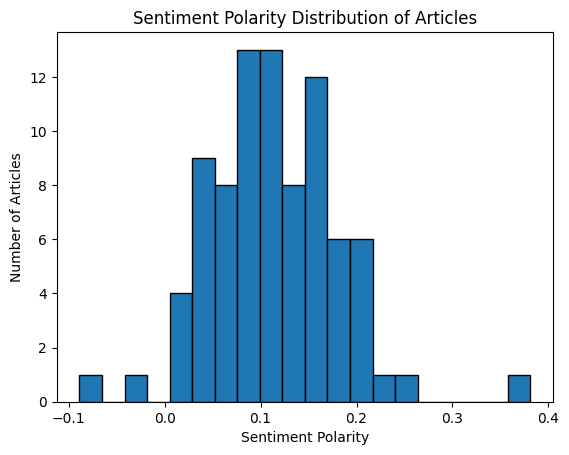

In [9]:
from textblob import TextBlob

for article_info in articles_with_html_text:
    text = article_info['content']
    blob = TextBlob(text)

    # Get the sentiment polarity (range: -1 to 1, where negative is negative sentiment, positive is positive sentiment)
    sentiment_polarity = blob.sentiment.polarity
    article_info['blob sentiment polarity'] = sentiment_polarity

    # Classify the sentiment as positive, negative, or neutral
    sentiment_class = "positive" if sentiment_polarity > 0 else "negative" if sentiment_polarity < 0 else "neutral"
    article_info['blob sentiment class'] = sentiment_class

# Extract sentiment polarities from the articles
sentiment_polarities = [article_info['blob sentiment polarity'] for article_info in articles_with_html_text]

# Create a histogram
plt.hist(sentiment_polarities, bins=20, edgecolor='black')

# Customize the plot
plt.title('Sentiment Polarity Distribution of Articles')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Number of Articles')

# Show the plot
plt.show()

**Interpretation:**
It would seem that most articles seem ot exhibit a slightly positive sentiment surrounding the Gig economy, though this is very mild and their definitely is a lack of positive enthuiasm, or heavy pessimism.

The code below uses the transformers library to utilize a pre-trained BERT model for sentiment analysis. Its worth noting that BERT only can analyse 512 words, so each article is cut of after 512 words so it can be inputted into the model. The code then creates a bar chart comparing the sentiment distribution of the articles according to BERT.

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

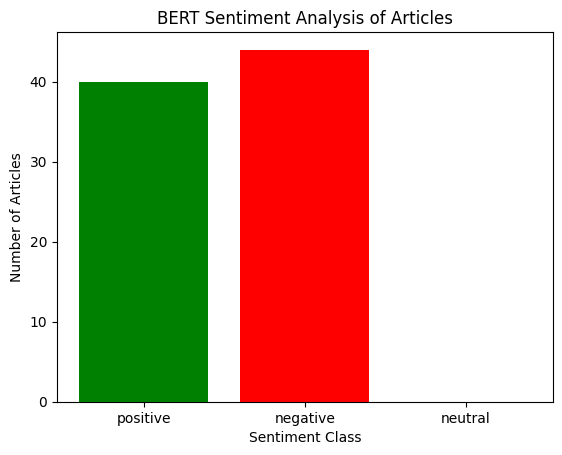

In [10]:
# !pip install transformers
from transformers import pipeline
# Load pre-trained BERT model for sentiment analysis
sentiment_analysis = pipeline('sentiment-analysis')

for article_info in articles_with_html_text:
    text = article_info['content'][:512]
    result = sentiment_analysis(text)
    article_info['bert sentiment class'] = f"{result[0]['label']}"
    article_info['bert sentiment confidence'] = f"{result[0]['score']:.4f}"

# Extract sentiment information from the articles
bert_sentiment_classes = [article_info['bert sentiment class'] for article_info in articles_with_html_text]

# Count the occurrences of each sentiment class
sentiment_counts = {
    'positive': bert_sentiment_classes.count('POSITIVE'),
    'negative': bert_sentiment_classes.count('NEGATIVE'),
    'neutral': bert_sentiment_classes.count('NEUTRAL')
}

# Create a bar chart
plt.bar(sentiment_counts.keys(), sentiment_counts.values(), color=['green', 'red', 'gray'])

# Customize the plot
plt.title('BERT Sentiment Analysis of Articles')
plt.xlabel('Sentiment Class')
plt.ylabel('Number of Articles')

# Show the plot
plt.show()


**Interpretation:**
The split of articles between positive and negative appears to be relatively even split between how the Gig economy is presented in the media.

# **3.Cartography**:

Mapping the gig economy's footprint, we will visually represent the distribution and density of gig jobs in various urban areas.

<ipython-input-11-a8e52b23312a>:34: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  uk = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-11-a8e52b23312a>:43: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', 10)
<ipython-input-11-a8e52b23312a>:48: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((row['Longitude'], row['Latitude']),


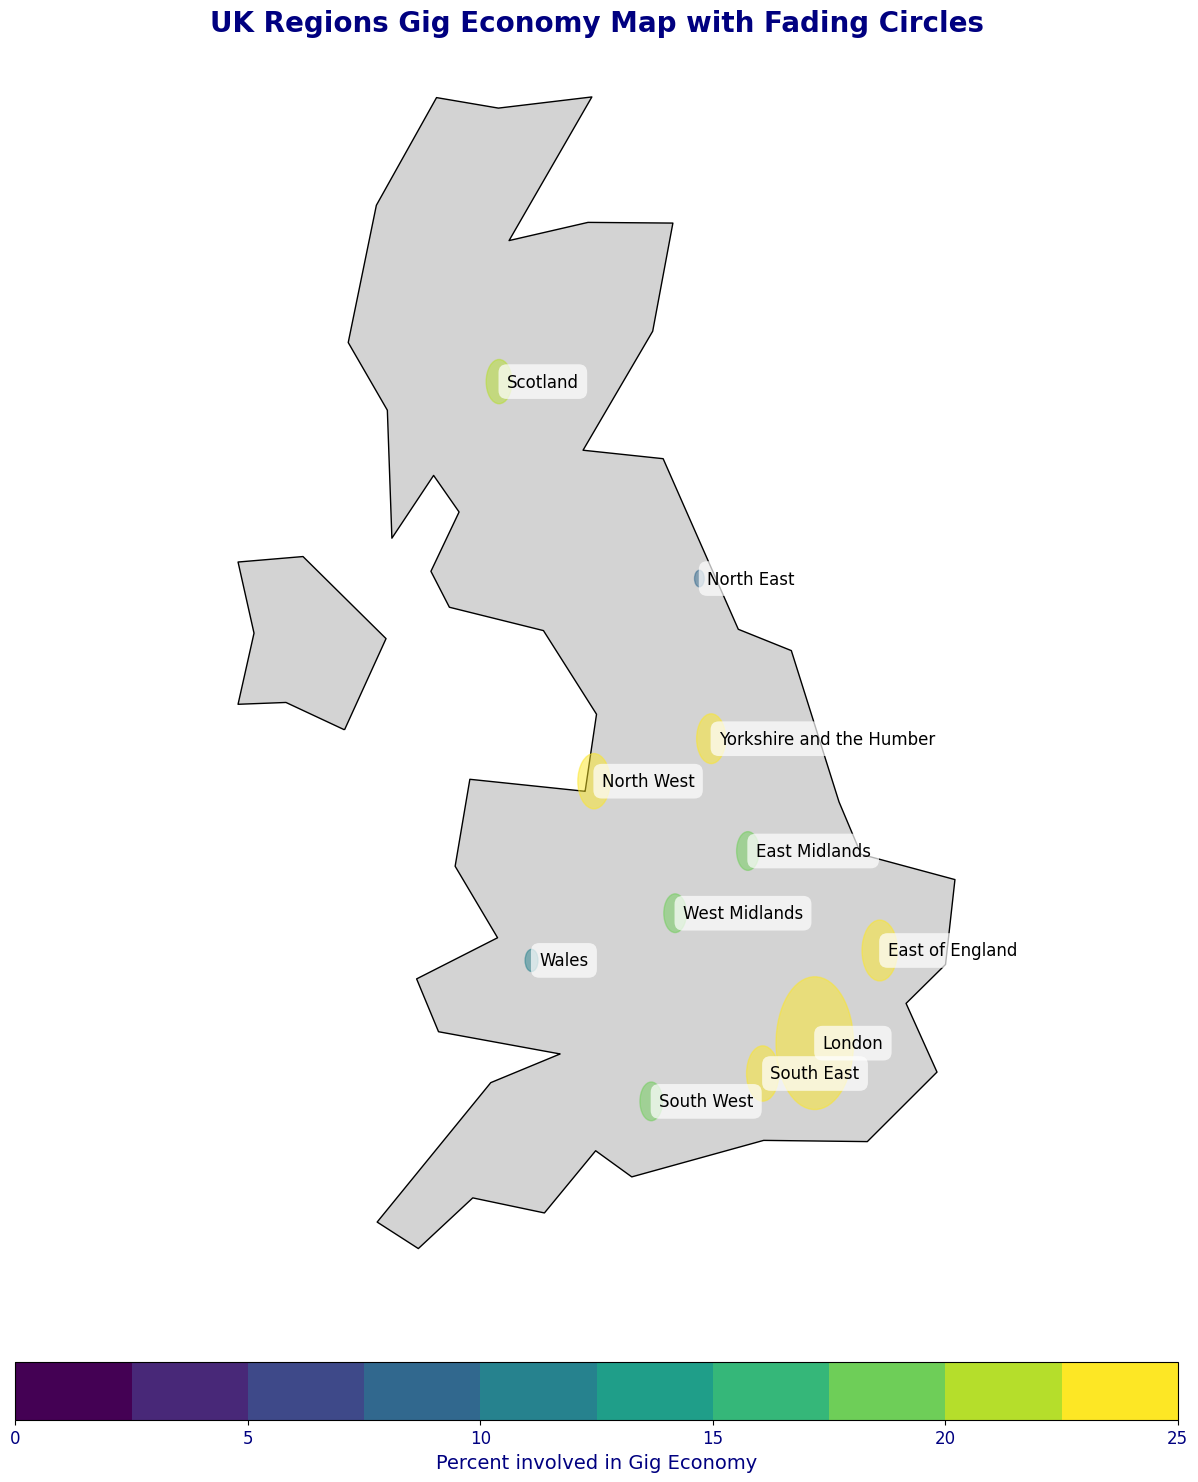

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Load the provided data file
file_path = '/content/Gig Location Data - Sheet1 (1).csv'
data = pd.read_csv(file_path)

# Coordinates for the center of each region in the UK
coordinates = {
    'London': (-0.127758, 51.507351),
    'East of England': (0.711110, 52.205337),
    'South East': (-0.799830, 51.278709),
    'North West': (-2.977838, 53.480759),
    'Yorkshire and the Humber': (-1.465190, 53.800755),
    'West Midlands': (-1.930483, 52.486243),
    'East Midlands': (-0.990780, 52.954783),
    'South West': (-2.238514, 51.068787),
    'North East': (-1.617439, 55.007110),
    'Wales': (-3.783721, 52.130661),
    'Scotland': (-4.202646, 56.490671),
    'Northern Ireland': (-6.492314, 54.787715)
}


# Adding coordinates to the DataFrame
data['Coordinates'] = data['Place'].map(coordinates)
data[['Longitude', 'Latitude']] = pd.DataFrame(data['Coordinates'].tolist(), index=data.index)

# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.Longitude, data.Latitude))

# Load UK shapefile
uk = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
uk = uk[uk.name == "United Kingdom"]
gdf = gdf.set_crs(uk.crs)

# Creating the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(15, 18))
uk.plot(ax=ax, color='lightgray', edgecolor='black')

# Setting the colormap
cmap = plt.cm.get_cmap('viridis', 10)

# Plotting each region with a fading circle
for idx, row in gdf.iterrows():
    color = cmap(row['Percent involved in Gig Economy'] / 100 * 10)
    circle = plt.Circle((row['Longitude'], row['Latitude']),
                        0.5 * row['Percent involved in Gig Economy'] / max(gdf['Percent involved in Gig Economy']),
                        color=color, alpha=0.5, edgecolor='none')
    ax.add_artist(circle)
    ax.text(row['Longitude'] + 0.1, row['Latitude'], row['Place'], fontsize=12, ha='left', va='center',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'))

# Customizing the map
ax.set_title('UK Regions Gig Economy Map with Fading Circles', fontsize=20, fontweight='bold', color='navy')
ax.set_axis_off()

# Adding a decorative frame
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(2)

# Adding a colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=25))
sm._A = []
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.046, pad=0.04)
cbar.set_label('Percent involved in Gig Economy', fontsize=14, color='navy')
cbar.ax.tick_params(labelsize=12, labelcolor='navy')

# Displaying the map
plt.show()


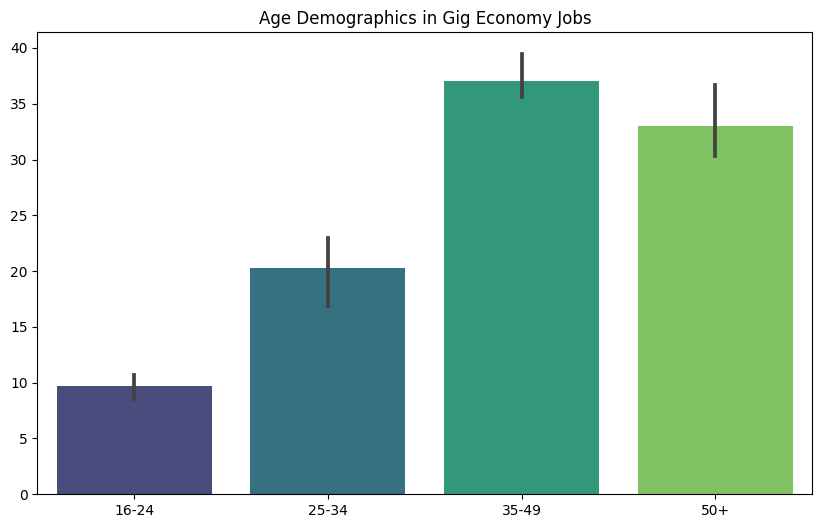

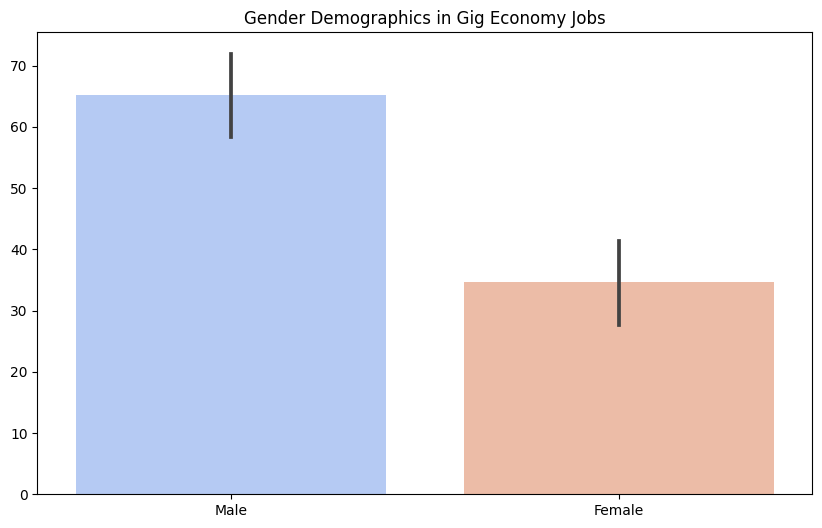

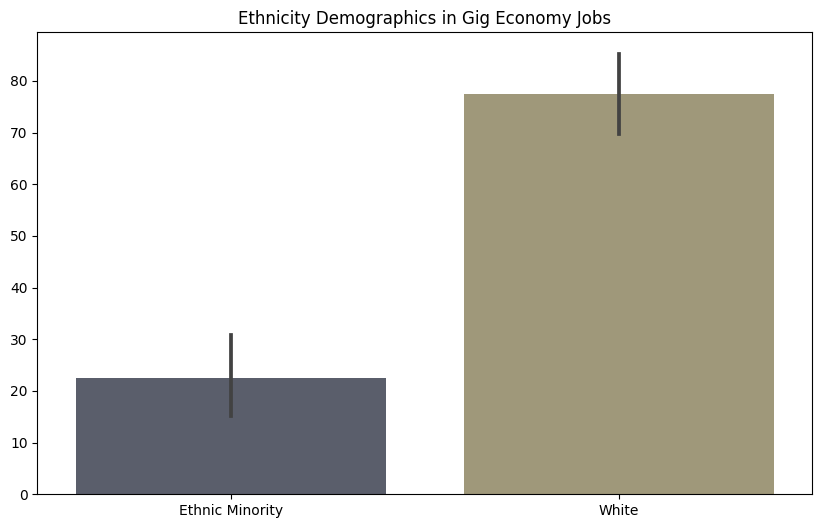

In [18]:

import seaborn as sns

def plot_demographic_data(data, title, categories, color_map):
    # Assuming data is a DataFrame with categories as columns
    plt.figure(figsize=(10, 6))
    sns.barplot(data=data, palette=color_map)
    plt.title(title)
    plt.xticks(range(len(categories)), categories)
    plt.show()


data_age = pd.read_csv('/content/Gig Data - Age.csv')
data_gender = pd.read_csv('/content/Gig Data - Gender.csv')
data_ethnicity = pd.read_csv('/content/Gig Data - Ethnicity.csv')

# plotting
plot_demographic_data(data_age, 'Age Demographics in Gig Economy Jobs', ['16-24', '25-34', '35-49', '50+'], 'viridis')
plot_demographic_data(data_gender, 'Gender Demographics in Gig Economy Jobs', ['Male', 'Female'], 'coolwarm')
plot_demographic_data(data_ethnicity, 'Ethnicity Demographics in Gig Economy Jobs', ['Ethnic Minority', 'White'], 'cividis')


# **4. Science-Fiction:**

*This fictional story was inspired by a real gig economy worker I met at a restaurant. She supplements her main source of income (working as an educational psychologist research assistant) with gig jobs at artisanal coffee shops.*


*In the story’s semi-dystopian future, gig workers, called ‘Giggers’, and those who hold salaried positions, ‘Salariers’, conflict with one another in everyday life. Gig workers have been unionized, which has eliminated individual gig-based companies and created a sub-culture of Giggers. Our heroin, Georgia, has just chosen a life of Gigging. Donning her Gig-issued uniform and hoover scooter, we witness her struggle to find her place in London while living as a freelance coffee shop barista.*



*The story makes use of two main types of psychological distance to create a sense of separation between the reader and the imaginary world in which the story is set: temporal distance, as the story is set in a semi-dystopian, futuristic society; social distance, as the story explores an alternative society in which the cultural norms and structures of today are drastically altered.*

The sky over London was a canvas of clouds, the kind that seemed to press down on you, making the city feel like a world enclosed. Under that sky, I rode my hover scooter, zipping past the sharp angles of glass and steel that this city seemed to be so proud of. Everyone like me, all the gig workers, we were a sea of grey uniforms, each of us blending into the next. Each of us darting from shop to shop, or from door to door. Delivering meals, or transporting Salariers to their oh-so-important offices that towered over me like foreboding totem poles in the city’s concrete forest. Our Head of Giggers had claimed that the grey of our uniforms promoted neutrality and professionalism, just as we were meant to. But to me, it felt like the color of uncertainty.



I was new to this, after all. Just sixteen years of age and still a brand new Gigger. It wasn’t an easy choice, to forgo a life of security as a Salarier for the flexibility and promise of opportunity as a Gigger. But by luck of the draw, I had landed one of the best Gigs — a freelancing barista flitting between the coffee shops that dotted London like stars in an urban night. I pitied those who were stuck with less respected Gigs, who could barely make ends meet as the shifting city demanded fewer and fewer Gig tutors or creatives, yet more and more couriers and deliverers to meet the skyrocketing demand for instant gratification. Whatever. We all know what we sign up for. And my Gig, well, it was supposed to be a stroke of luck. But as the months went by and I moved from one shop to another, I started to feel less lucky. Each café I visited, with its Salariers and their steady eyes and sure hands, had made me feel like I was always on the outside, looking in through a window at a world I wasn't part of. They seemed to belong in a way I wasn't sure I ever would.



Each day was always a whirlwind. My scooter would fly me over the streets of London to whichever café was in need of an extra pair of hands. Whether their Salariers were on holiday– a luxury I gave up as a Gigger– or out due to illness. And then there was the blur of faces and coffee orders, a jumble of "please" and "thank you" that never seemed to land on me but floated somewhere above my head. I carried out the motions, the presses and pours that made a perfect flat white or cappuccino. But even as I exchanged dozens of scalding coffee cups from customer to customer, the warmth never seemed to penetrate the cold grey of my uniform. Against the comforting, earthy tones of the café that I found myself working in today, I stuck out like a sore thumb alongside the café’s Salariers, moving fluidly behind the coffee counter, with their black shirts and brown aprons. And then there was me, and I was just as mechanical as the espresso machine I was operating.



Each café I’ve worked at has had its own rhythm, a beat that the regular customers knew by heart. I tried to follow, but I was always a step behind, a visitor passing through. As days turned into weeks, the novelty of the hover scooter and the different views from each coffee shop window started to fade. I found myself staring outside at whichever foreign neighborhood I had landed in that day, from inside an even more foreign space filled with unfamiliar people and nothing to tie me to the other Salariers. A few months of the same routine and the shops eventually began to look the same. The orders sounded identical, and the faces of my temporary co-workers melded into one indistinguishable mass. I was a shadow in grey, moving silently from one place to another, always there but never quite fitting in.



The beginning of the end came one rainy Tuesday. I received the request directly to my Gig-issued scooter which immediately calculated the route to the café I would call home today. I hopped on and let myself fly to yet another unknown destination where, nonetheless, I would be expected to deliver countless cups of coffees to demanding Salariers on their coffee break, alongside coworkers I would meet once and likely never again.



This particular shop was bustling, a storm of customers seeking shelter and warmth from caffeine and the indoors. I was nearing the end of my shift, and by then my movements had become completely mechanized. I heard a demanding voice cut through the drone of orders. A suited man, a Salarier and clearly self-important, was gesturing wildly with his phone. He refused to meet my eye as I took his order. Coffee- black - no milk, no sugar. I crafted his order with care as always, but as I handed it over to his meaty hand, an out-of-the-blue gesticulation of his arm sent the cup of scalding liquid sky-high. Time slowed. As the coffee arced through the air, there came a brown rain of hot bean water soaking his pristine suit.



The silence that followed was deafening. The man stood there in disbelief. Out of the corner of my eye I see the café manager, who had introduced himself as Steve. Then the yelling started. Steve a proud Salarier who wore his job like a suit of armor, turned on me with the full force of his frustration. "What is wrong with you?!" he bellowed, his face red, his finger pointing to the door. "Get out. I knew I never should have trusted a Gigger in my café!"



I fled. The grey uniform sticking to my skin, my face hot with shame and anger. As I rode away, the tears mixed with the rain. It was then I made a decision. I knew I couldn't be a part of this Gig world anymore. This life of fleeting connections and constant uncertainty. I wanted a place to belong, a team to be part of, a life that offered more than the endless unrewarding scramble.



As the city lights flickered on, casting their electric glow onto the evening streets, I found myself back in my small apartment, the hum of my hover scooter's engine still ringing in my ears. The grey uniform lay crumpled on my bed, a discarded shell of the day's turmoil. The walls around me, which had once felt like the starting blocks of a race to freedom, now seemed to close in, a reminder of the rigidity of my choice to be a Gigger. And the barriers between us, they loomed. They were a seemingly insurmountable fortress that kept Giggers and Salaried apart. But even still, a wave of resolve washed over me as I realised escape was my only path forward. I would have to disappear into the night, shed my identity as easily as I shed my uniform, and emerge anew in a different city where the rules of the game might bend in my favor. Only then could I weave myself into the fabric of a Salarier's life, find a place where I was more than a fleeting presence, and claim the sense of purpose that had eluded me for so long.



I rode my scooter for one last time to the Thames embankment, the slightest drizzle of rain pattering down on my head as the purple haze above the river awaited the dawn that had not yet broken. I squeezed my eyes tight, trying not to wince as the loud splash of the scooter in the river ricocheted around me, audible over the rain that had since quieted. I dragged myself, my new self, along the river towards the bus stop where I would leave the life I knew behind in search of one of opportunity. I passed by one of the cafes where I has once been a shadow, the dim light revealing the quiet bustle of the Salariers preparing for another busy day. I watched the baristas, who once played the role of my transient coworkers, moving with the confidence of belonging. That café was their domain. Succeed or fail, it was theirs. It was that moment I understood that my journey in Gig wasn't a waste; it was a lesson. A lesson in what I had come to value. Working with good people wasn't about the uniform or the job; it was about finding those who made you feel like you were part of something bigger.